In [1]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt

In [20]:
def contour_detect(img):
    cordn_list= []
    
    # convert image from bgr to rgb
    rgb_img= cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    # convert image to gray scale
    gray_img= cv2.cvtColor(rgb_img, cv2.COLOR_RGB2GRAY)
    
    # apply thresholding to create a binary image
    _, th2= cv2.threshold(gray_img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
#     print(_, th2)
    
    # find contours in the binary img
    contours, hierarchy= cv2.findContours(th2, cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)
    
    # Extract region of white regions
    white_rgns_cord= []
    
    for contour in contours:
        cord= contour.squeeze().astype(float).tolist()
        white_rgns_cord.append(cord)
        
    # Print cord of each white region
    for i, reg in enumerate(white_rgns_cord):
        if type(reg[0]) is list:
            if len(reg) > 2:
                
                # calculate the area of the contour
                area= cv2.contourArea(np.around(np.array([[pnt] for pnt in reg])).astype('int32'))
                
                if area>100:
                    
                    # convert cord to the required format
                    crdnt= [{'x': i[0], 'y':i[1]} for i in reg]
                    cordn_list.append(crdnt)
                    
    return cordn_list
    
    


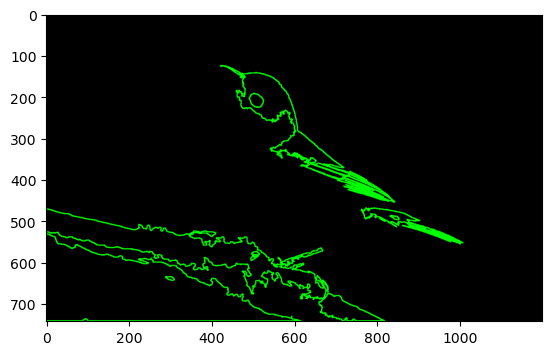

In [21]:
 # read the img
img= cv2.imread(r"C:\Users\varsha\Pictures\CV_IMG\1200.jpg")
# Extract polygons from the image
polygons = contour_detect(img)

# Get the height and width of the image
height, width = img.shape[:2]

# Create a black image with the same dimensions as the input
black_image = np.zeros((height, width, 3), dtype=np.uint8)

# Draw polygons on the black image
for ply in polygons:
    ply_list = [[pnt['x'], pnt['y']] for pnt in ply]

    # Define the vertices of the polygon
    vertices = np.array(ply_list, dtype=np.int32)

    # Draw the polygon on the black image
    cv2.polylines(black_image, [vertices], isClosed=True, color=(0, 255, 0), thickness=2)

# Save the output image
# cv2.imwrite(fout, black_image)
plt.imshow(black_image)